In [3]:
import torch
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'torchvision'

In [3]:
train_dataset_path = r'C:\Users\AdmPDI\Desktop\will\pytorchproject\studysession\data\train'
test_dataset_path = r'C:\Users\AdmPDI\Desktop\will\pytorchproject\studysession\data\test'

In [4]:
batch_size = 32
mean=(0.5,0.5,0.5)
std=(0.5,0.5,0.5)

transform = transforms.Compose([
     transforms.Resize((64, 64)),
     transforms.ToTensor(),
     transforms.Normalize(mean, std)
     ])



train_data = torchvision.datasets.ImageFolder(root=train_dataset_path, transform=transform)

test_data = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=transform)


In [5]:
(len(train_data)), (len(test_data))

(2296, 225)

In [6]:
# Prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
categorias = ["aro", "cubo", "raio"]

In [7]:
len(train_loader), len(test_loader)

(72, 8)

raio  aro  raio  aro  cubo  aro  aro  aro  cubo  aro  raio  aro  cubo  aro  aro  aro  raio  aro  raio  cubo  aro  cubo  cubo  aro  cubo  cubo  aro  raio  aro  aro  aro  cubo


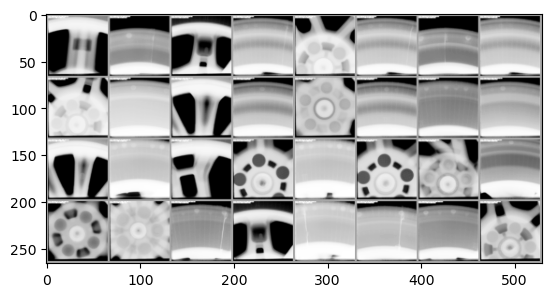

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(categorias[labels[j]] for j in range(32)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class ConvolutionalModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.convlayers = nn.Sequential(
        nn.Conv2d(3, 16, 4),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, 4),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),       
      )
 
      self.linearlayers = nn.Sequential(
          nn.Linear(5408, 128),
          nn.ReLU(),
          nn.Linear(128, 3),
          ) 
 
  def forward(self, x):
      x = self.convlayers(x)
      x = torch.flatten(x, 1)
      return self.linearlayers(x)
  


In [10]:
#model = ConvolutionalModel()
#input = torch.rand([4, 3, 256, 256]) # [batch size, channels, height, width]
#print(f"Input shape: {input.shape}")
#output = model.forward(input)
#print(f"Output shape: {output.shape}")


In [1]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

NameError: name 'torch' is not defined

In [12]:
model = ConvolutionalModel().to(device)

In [13]:
model.eval()

ConvolutionalModel(
  (convlayers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linearlayers): Sequential(
    (0): Linear(in_features=5408, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [14]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [15]:
def train(model, dataloader, loss_func, optimizer):
  model.train()
  cumloss = 0.0

  for imgs, labels in dataloader:
    imgs, labels = imgs.to(device), labels.to(device)
    
    optimizer.zero_grad()

    pred = model(imgs)

    loss = loss_func(pred, labels)
    loss.backward()
    optimizer.step()

    cumloss += loss.item()

  return cumloss / len(dataloader)

def validate(model, dataloader, loss_func):
  model.eval()
  cumloss = 0.0

  with torch.no_grad():
    for imgs, labels in dataloader:
      imgs, labels = imgs.to(device), labels.to(device)

      pred = model(imgs)
      loss = loss_func(pred, labels)
      cumloss += loss.item()

  return cumloss / len(dataloader)

In [16]:
len(train_loader)

72

In [17]:
def plot_losses(losses):
  fig = plt.figure(figsize=(13, 5))
  ax = fig.gca()
  for loss_name, loss_values in losses.items():  
    ax.plot(loss_values, label=loss_name)
  ax.legend(fontsize="16")
  ax.set_xlabel("Iteration", fontsize="16")
  ax.set_ylabel("Loss", fontsize="16")
  ax.set_title("Loss vs iterations", fontsize="16");

In [18]:
epochs = 10
train_losses = []
test_losses = []
for t in range(epochs):
  train_loss = train(model, train_loader, loss_func, optimizer)
  train_losses.append(train_loss)

  test_loss = validate(model, test_loader, loss_func)
  test_losses.append(test_loss)

  if t % 2 == 0:
    print(f"Epoch [{t+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}")

Epoch [1/10], Train Loss: 1.0702, Validation Loss: 1.0293
Epoch [3/10], Train Loss: 0.9060, Validation Loss: 0.8045
Epoch [5/10], Train Loss: 0.5879, Validation Loss: 0.4813
Epoch [7/10], Train Loss: 0.3369, Validation Loss: 0.2697
Epoch [9/10], Train Loss: 0.1767, Validation Loss: 0.1348


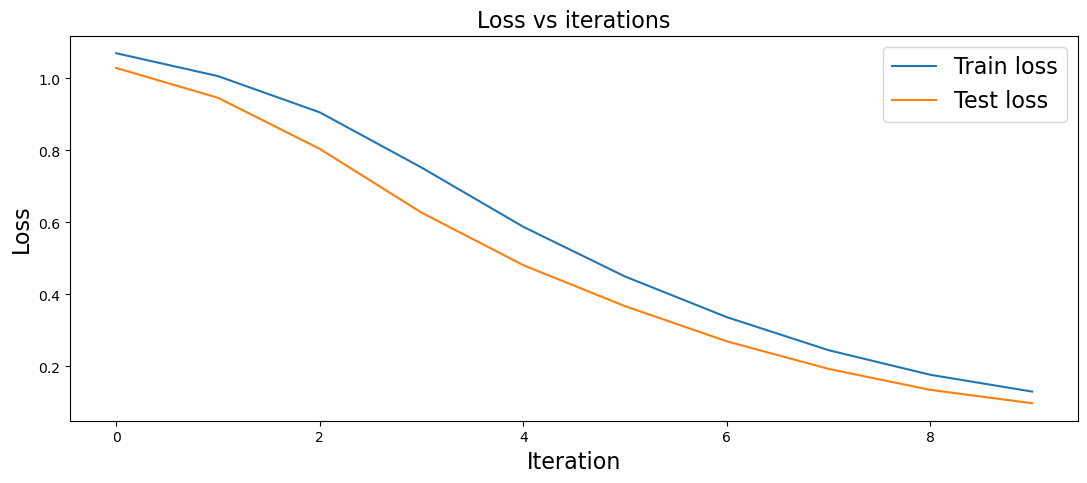

In [19]:
losses = {"Train loss": train_losses, "Test loss": test_losses}
plot_losses(losses)

In [20]:
def make_confusion_matrix(model, loader, n_classes):
  confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int64)
  with torch.no_grad():
    for i, (imgs, labels) in enumerate(loader):
      imgs = imgs.to(device)
      labels = labels.to(device)
      outputs = model(imgs)
      _, predicted = torch.max(outputs, 1)
      for t, p in zip(torch.as_tensor(labels, dtype=torch.int64).view(-1), 
                      torch.as_tensor(predicted, dtype=torch.int64).view(-1)):
        confusion_matrix[t, p] += 1
  return confusion_matrix

def evaluate_accuracy(model, dataloader, classes, verbose=True):
  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  confusion_matrix = make_confusion_matrix(model, dataloader, len(classes))
  if verbose:
    total_correct = 0.0
    total_prediction = 0.0
    for i, classname in enumerate(classes):
      correct_count = confusion_matrix[i][i].item()
      class_pred = torch.sum(confusion_matrix[i]).item()

      total_correct += correct_count
      total_prediction += class_pred

      accuracy = 100 * float(correct_count) / class_pred
      print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                    accuracy))
  print("Global acccuracy is {:.1f}".format(100 * total_correct/total_prediction))
  return confusion_matrix

def test(model, dataloader, classes):
  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  # again no gradients needed
  with torch.no_grad():
      for images, labels in dataloader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  # print accuracy for each class
  total_correct = 0.0
  total_prediction = 0.0
  for classname, correct_count in correct_pred.items():
      total_correct += correct_count
      total_prediction += total_pred[classname]
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                    accuracy))
  print("Global acccuracy is {:.1f}".format(100 * total_correct/total_prediction))


In [21]:
confusion_matrix = evaluate_accuracy(model, test_loader, categorias)

Accuracy for class aro   is: 100.0 %
Accuracy for class cubo  is: 100.0 %
Accuracy for class raio  is: 100.0 %
Global acccuracy is 100.0


In [23]:
import seaborn as sn

<AxesSubplot:>

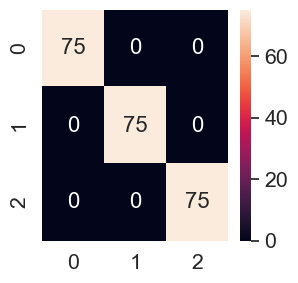

In [24]:
plt.figure(figsize=(3, 3))
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix.tolist(), 
           annot=True, annot_kws={"size": 16}, fmt='d')

In [55]:
from PIL import Image

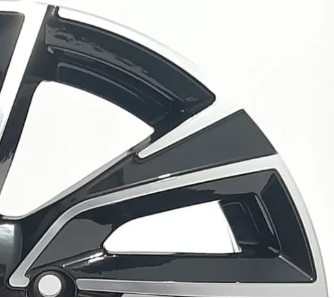

In [70]:
img = Image.open('rodaraio.png')
img

In [71]:
mean=(0.5,0.5,0.5)
std=(0.5,0.5,0.5)
transform = transforms.Compose([
     transforms.Resize((64, 64)),
     transforms.Grayscale(3),
     transforms.ToTensor(),
     transforms.Normalize(mean, std)
     ])

imgtensor = transform(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


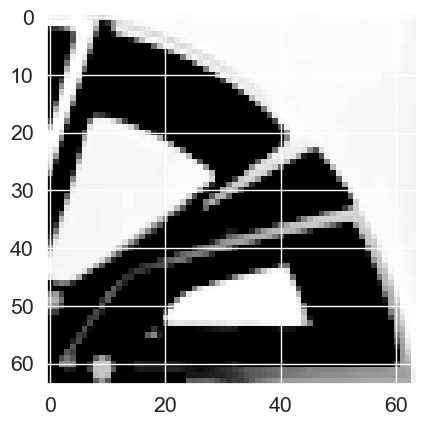

In [72]:
plt.imshow(imgtensor.permute(1,2, 0))

In [73]:
batch = imgtensor.unsqueeze(0).to(device)

In [74]:
model.eval()

ConvolutionalModel(
  (convlayers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linearlayers): Sequential(
    (0): Linear(in_features=5408, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [75]:
output = model(batch)
output

tensor([[-1.6378,  0.1183,  1.2669]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [76]:
logits = torch.nn.functional.softmax(output, dim=1) * 100
prob_dict = {}
for i, classname in enumerate(categorias):
  prob = logits[0][i].item()
  print(f"{classname} score: {prob:.2f}")
  prob_dict[classname] = [prob]

aro score: 3.99
cubo score: 23.11
raio score: 72.89


In [77]:
import pandas as pd

In [78]:
df_prob = pd.DataFrame.from_dict(prob_dict)

<AxesSubplot:>

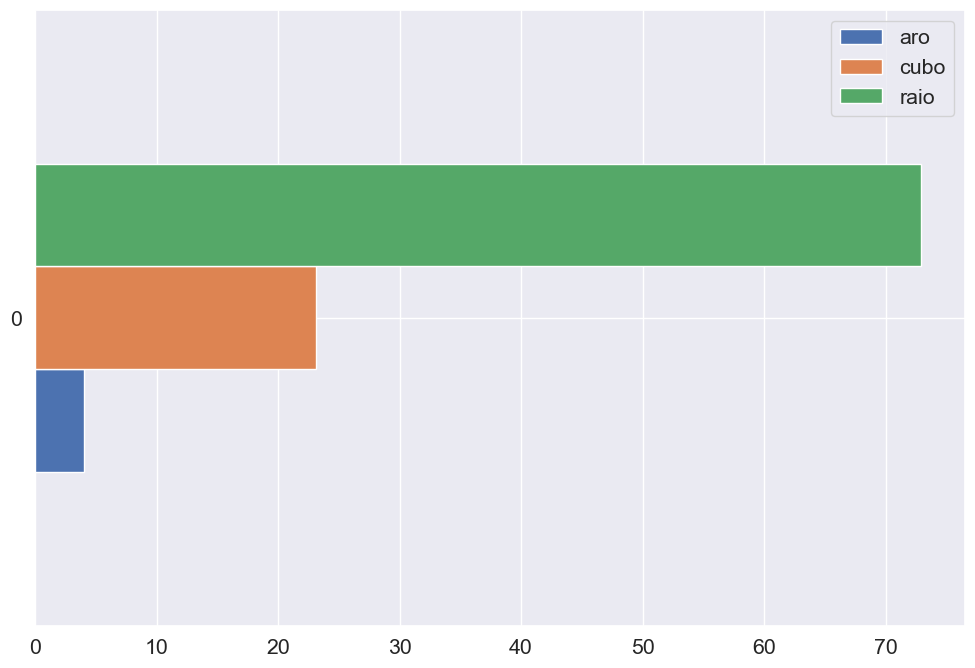

In [79]:
df_prob.plot(kind='barh', figsize=(12, 8))

In [ ]:
torch.save(model.state_dict(), 'model1.pth')